# Predicting mental illness for health insurance
# 1. Business Understanding
Which group of people, determined by age, gender, previous illness and job characteristics, has to pay a higher insurance premium in proportion. So that, in the event of a general claim and loss of working hours, sufficient coverage is guaranteed for the insurance to be able to finance additional treatment costs incurred for mental illnesses?  


# 2. Data and Data Understanding  
## 2.1. Import of Relevant Modules  

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import svm, datasets

from sklearn.preprocessing import LabelEncoder


## 2.2. Read Data  

In [2]:
data = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Predicting_clicks_on_online_advertising_by_Facebook_data.csv') # read data
data.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments;;;;
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NA;;;;
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NA;;;;
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NA;;;;
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NA;;;;
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NA;;;;


## 2.3. Descriptive Analytics  

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      745 non-null    object
 5   self_employed              1240 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
data.describe(include='all') #Alle Daten statistisch anschauen

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments;;;;
count,1259,1.259000e+03,1259,1259,745,1240,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
unique,1246,NaN,49,49,47,3,2,2,5,8,...,6,5,3,4,3,3,3,4,3,161
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,NA;;;;
freq,2,NaN,615,751,138,1094,767,636,464,289,...,563,490,925,774,516,1008,556,575,1074,1095
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def attribute_description(data):
    longestColumnName = len(max(np.array(data.columns), key=len))
    print("| Feature  | Data Type|")
    print("|-----|------|")
    for col in data.columns:
        description = ''
        col_dropna = data[col].dropna()
        example = col_dropna.sample(1).values[0]
        if type(example) == str:
            description = 'str '
            if len(col_dropna.unique()) < 10:
                description += '{'
                description += '; '.join([ f'"{name}"' for name in col_dropna.unique()])
                description += '}'
            else:
                description += '[ example: "'+ example + '" ]'
        elif (type(example) == np.int32) and (len(col_dropna.unique()) < 10) :
            description += 'dummy int32 {'
            description += '; '.join([ f'{name}' for name in sorted(col_dropna.unique())])
            description += '}'
        else:
            try:
                description = example.dtype
            except:
                 description = type(example)
        print("|" + col.ljust(longestColumnName)+ f'|   {description}  |')
 
attribute_description(data) 

| Feature  | Data Type|
|-----|------|
|Timestamp                |   str [ example: "2014-08-28 10:00:48" ]  |
|Age                      |   int64  |
|Gender                   |   str [ example: "male" ]  |
|Country                  |   str [ example: "Mexico" ]  |
|state                    |   str [ example: "TN" ]  |
|self_employed            |   str {"Yes"; "No"; "IL"}  |
|family_history           |   str {"No"; "Yes"}  |
|treatment                |   str {"Yes"; "No"}  |
|work_interfere           |   str {"Often"; "Rarely"; "Never"; "Sometimes"; "Yes"}  |
|no_employees             |   str {"6-25"; "More than 1000"; "26-100"; "100-500"; "1-5"; "500-1000"; "Often"; "Sometimes"}  |
|remote_work              |   str {"No"; "Yes"; "1-5"; "6-25"}  |
|tech_company             |   str {"Yes"; "No"}  |
|benefits                 |   str {"Yes"; "Don't know"; "No"}  |
|care_options             |   str {"Not sure"; "No"; "Yes"; "Don't know"}  |
|wellness_program         |   str {"No"; "Don't k

| Feature  | Data Type|
|-----|------|
|Timestamp                |   str [ example: "2014-08-27 20:52:31" ]  |
|Age                      |   int64  |
|Gender                   |   str [ example: "Male" ]  |
|Country                  |   str [ example: "China" ]  |
|state                    |   str [ example: "OR" ]  |
|self_employed            |   str {"Yes"; "No"; "IL"}  |
|family_history           |   str {"No"; "Yes"}  |
|treatment                |   str {"Yes"; "No"}  |
|work_interfere           |   str {"Often"; "Rarely"; "Never"; "Sometimes"; "Yes"}  |
|no_employees             |   str {"6-25"; "More than 1000"; "26-100"; "100-500"; "1-5"; "500-1000"; "Often"; "Sometimes"}  |
|remote_work              |   str {"No"; "Yes"; "1-5"; "6-25"}  |
|tech_company             |   str {"Yes"; "No"}  |
|benefits                 |   str {"Yes"; "Don't know"; "No"}  |
|care_options             |   str {"Not sure"; "No"; "Yes"; "Don't know"}  |
|wellness_program         |   str {"No"; "Don't know"; "Yes"}  |
|seek_help                |   str {"Yes"; "Don't know"; "No"}  |
|anonymity                |   str {"Yes"; "Don't know"; "No"}  |
|leave                    |   str {"Somewhat easy"; "Don't know"; "Somewhat difficult"; "Very difficult"; "Very easy"; "Yes"}  |
|mental_health_consequence|   str {"No"; "Maybe"; "Yes"; "Very easy"; "Don't know"}  |
|phys_health_consequence  |   str {"No"; "Yes"; "Maybe"}  |
|coworkers                |   str {"Some of them"; "No"; "Yes"; "Maybe"}  |
|supervisor               |   str {"Yes"; "No"; "Some of them"}  |
|mental_health_interview  |   str {"No"; "Yes"; "Maybe"}  |
|phys_health_interview    |   str {"Maybe"; "No"; "Yes"}  |
|mental_vs_physical       |   str {"Yes"; "Don't know"; "No"; "Maybe"}  |
|obs_consequence          |   str {"No"; "Yes"; "Don't know"}  |
|comments;;;;             |   str [ example: "NA;;;;" ]  |

# 3. Data Preparation  
## 3.1 Remove duplicates

In [6]:
data[data.duplicated(keep=False)] # show duplicates

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments;;;;


## 3.2 Remove missing data

In [7]:
data.isnull().sum() #count missing data

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        514
self_employed                 19
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments;;;;                   0
dtype: int64

In [8]:
data1 = data.drop(['Timestamp','state','comments;;;;'], axis =1)
# delete features, that are not needed

In [9]:
data1['self_employed'] = data1['self_employed'].fillna(data1['self_employed'].mode().iloc[0]) 
# replace missing data in 'self_employed' wwith 'No'

In [10]:
data1.isnull().sum()

Age                            0
Gender                         0
Country                        0
self_employed                  0
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [11]:
data1 = data1.dropna(axis=0) # remove rows with missing data (in 'work_interfere)

In [12]:
data1.isnull().sum() # make sure there is no missing data now

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

## 2.3 Remove unwanted Features

In [13]:
data1.columns.values 

array(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'], dtype=object)

In [14]:
data1 = data1.drop(['Country','wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence',
       'coworkers', 'supervisor', 'mental_health_interview',
       'phys_health_interview', 'mental_vs_physical', 'obs_consequence'], axis = 1) 
# remove features that are not relevant
# and remove features, that are relevant, but can not be used in the final model, 
# as the data can not be collected in the production environment

In [15]:
data1.columns.values # these features are left

array(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options'], dtype=object)

In [16]:
data1.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options
count,9.950000e+02,995,995,995,995,995,995,995,995,995,995
unique,NaN,44,3,2,2,5,8,4,2,3,4
top,NaN,Male,No,No,Yes,Sometimes,26-100,No,Yes,Yes,Yes
freq,NaN,481,870,546,632,464,229,690,815,406,393
mean,1.005025e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.170213e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data1['Age'].values

array([         37,          44,          32,          31,          31,
                33,          35,          39,          42,          23,
                31,          29,          42,          36,          27,
                29,          23,          32,          46,          29,
                31,          46,          41,          33,          35,
                35,          34,          37,          32,          31,
                30,          42,          40,          27,          29,
                35,          24,          27,          18,          30,
                38,          26,          30,          22,          32,
                27,          24,          33,          44,          26,
                27,          35,          40,          23,          36,
                34,          28,          34,          23,          33,
                31,          32,          28,          38,          23,
                30,          27,          33,          39,      

## 2.4 Remove outliers

some people have put in a troll value for 'age' these rows need to be removed  
the age should be between 16 and 70

<AxesSubplot:xlabel='Age', ylabel='Count'>

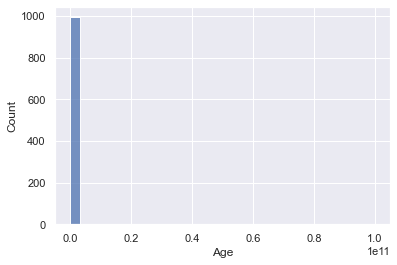

In [18]:
sns.histplot(data = data1, x = 'Age', bins="sqrt")

<AxesSubplot:xlabel='Age', ylabel='Count'>

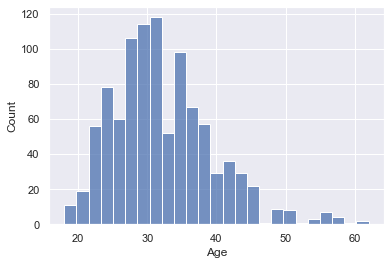

In [19]:
data2 = data1[data1['Age']<70] 
data2 = data2[data2['Age']>16]  
sns.histplot(data2['Age'])

In [20]:
data2['Age'].median(axis = 0) 

31.5

In [21]:
data2.columns.values # these features are left

array(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options'], dtype=object)

## 2.5 Clean the data

In [22]:
data2.columns.values

array(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options'], dtype=object)

In [23]:
# clean Gender
# reduce options to only male or female
data2['Gender'] = data2['Gender'].str.lower()
male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male"]
trans = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
data2['Gender'] = data2['Gender'].apply(lambda x:"Male" if x in male else x)
data2['Gender'] = data2['Gender'].apply(lambda x:"Female" if x in female else x)
data2['Gender'] = data2['Gender'].apply(lambda x:"Trans" if x in trans else x)
data2.drop(data2[data2.Gender == 'p'].index, inplace=True)
data2.drop(data2[data2.Gender == 'a little about you'].index, inplace=True)


In [24]:
plot_gender = data2['Gender'].value_counts().reset_index()
plot_gender.columns = ['Gender','count']

px.pie(plot_gender,values='count',names='Gender',template='ggplot2',title='Gender')

In [25]:
dropvalue = data2[ data2['Gender'] == 'ostensibly male' ].index 
data2.drop(dropvalue , inplace=True)
dropvalue1 = data2[ data2['Gender'] == 'Trans' ].index 
data2.drop(dropvalue1, inplace=True)

In [26]:
plot_gender = data2['Gender'].value_counts().reset_index()
plot_gender.columns = ['Gender','count']

px.pie(plot_gender,values='count',names='Gender',template='ggplot2',title='Gender')

In [27]:
plot_self = data2['self_employed'].value_counts().reset_index()
plot_self.columns = ['self_employed','count']

px.pie(plot_self,values='count',names='self_employed',template='ggplot2',title='Self employed')

# Self employed looks good

In [28]:
plot_fam = data2['family_history'].value_counts().reset_index()
plot_fam.columns = ['family_history','count']

px.pie(plot_fam,values='count',names='family_history',template='ggplot2',title='Family history')

# family history looks good

In [29]:
plot_treat = data2['treatment'].value_counts().reset_index()
plot_treat.columns = ['treatment','count']

px.pie(plot_treat,values='count',names='treatment',template='ggplot2',title='In treatment')

# in treatment looks good.
# this will be our target variable

In [30]:
plot_inter = data2['work_interfere'].value_counts().reset_index()
plot_inter.columns = ['work_interfere','count']

px.pie(plot_inter,values='count',names='work_interfere',template='ggplot2',title='Work interfere')

In [31]:
plot_numb = data2['no_employees'].value_counts().reset_index()
plot_numb.columns = ['no_employees','count']
px.pie(plot_numb,values='count',names='no_employees',template='ggplot2',title='Number of employees')

# no_employees looks good

In [32]:
plot_remo = data2['remote_work'].value_counts().reset_index()
plot_remo .columns = ['remote_work','count']

px.pie(plot_remo ,values='count',names='remote_work',template='ggplot2',title='Remote work')

# remote work looks good

In [33]:
plot_tech = data2['tech_company'].value_counts().reset_index()
plot_tech.columns = ['tech_company','count']

px.pie(plot_tech,values='count',names='tech_company',template='ggplot2',title='Tech company')

In [34]:
plot_bene = data2['benefits'].value_counts().reset_index()
plot_bene.columns = ['benefits','count']

px.pie(plot_bene,values='count',names='benefits',template='ggplot2',title='Benefits')

In [35]:
plot_care = data2['care_options'].value_counts().reset_index()
plot_care.columns = ['care_options','count']

px.pie(plot_care,values='count',names='care_options',template='ggplot2',title='Care options')

In [36]:
data2.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options
count,971.000000,971,971,971,971,971,971,971,971,971,971
unique,NaN,2,2,2,2,4,6,2,2,3,3
top,NaN,Male,No,No,Yes,Sometimes,26-100,No,Yes,Yes,Yes
freq,NaN,761,852,535,613,453,223,675,798,395,379
mean,32.330587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.268977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


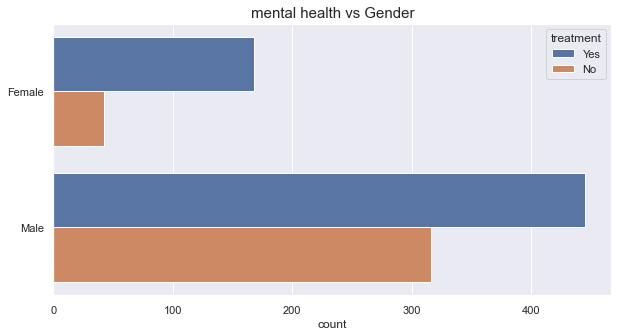

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(y="Gender", hue="treatment", data=data2)
plt.title("mental health vs Gender",fontsize=15,fontweight="normal")
plt.ylabel("")
plt.show()

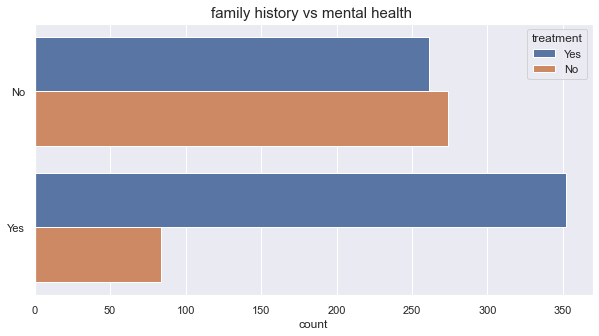

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(y="family_history", hue="treatment", data=data2)
plt.title("family history vs mental health ",
          fontsize=15,fontweight="normal")
plt.ylabel("")
plt.show()

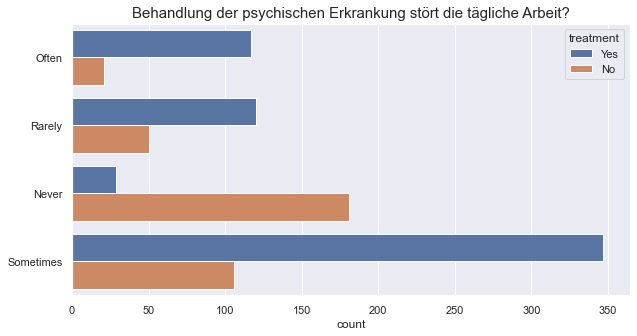

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(y="work_interfere", hue="treatment", data=data2)
plt.title("Behandlung der psychischen Erkrankung stört die tägliche Arbeit?",fontsize=15,fontweight="normal")
plt.ylabel("")
plt.show()


This feature look like a good predictor of the target variable treatment.   
But the information "Does your mental health interfere with your work" can not be collected.  
No one in their right mind would tell the truth to this question to their health insurance.   
therefore work interfere needs to be dropped

In [40]:
data2 = data2.drop('work_interfere', axis=1)

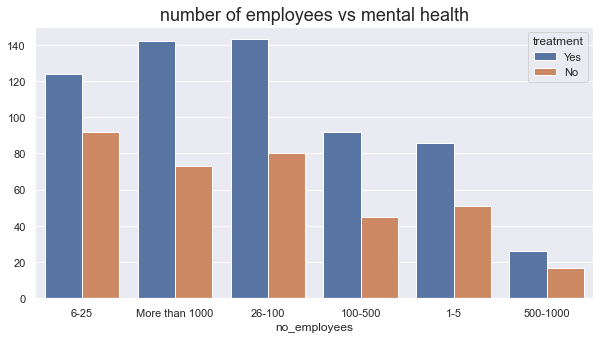

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x="no_employees", hue="treatment", data=data2)
plt.title("number of employees vs mental health",fontsize=18,fontweight="normal")
plt.ylabel("")
plt.show()

In [42]:
data2

,Age,Gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options
0,37,Female,No,No,Yes,6-25,No,Yes,Yes,Not sure
1,44,Male,No,No,No,More than 1000,No,No,Don't know,No
2,32,Male,No,No,No,6-25,No,Yes,No,No
3,31,Male,No,Yes,Yes,26-100,No,Yes,No,Yes
4,31,Male,No,No,No,100-500,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...
1252,29,Male,No,Yes,Yes,100-500,Yes,Yes,Yes,Yes
1253,36,Male,No,Yes,No,More than 1000,No,No,Don't know,No
1255,32,Male,No,Yes,Yes,26-100,Yes,Yes,Yes,Yes
1256,34,Male,No,Yes,Yes,More than 1000,No,Yes,Yes,Yes


In [43]:
data3 = data2.reset_index(drop = True)  

In [44]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             971 non-null    int64 
 1   Gender          971 non-null    object
 2   self_employed   971 non-null    object
 3   family_history  971 non-null    object
 4   treatment       971 non-null    object
 5   no_employees    971 non-null    object
 6   remote_work     971 non-null    object
 7   tech_company    971 non-null    object
 8   benefits        971 non-null    object
 9   care_options    971 non-null    object
dtypes: int64(1), object(9)
memory usage: 76.0+ KB


In [45]:
data3.describe(include="all")

,Age,Gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options
count,971.000000,971,971,971,971,971,971,971,971,971
unique,NaN,2,2,2,2,6,2,2,3,3
top,NaN,Male,No,No,Yes,26-100,No,Yes,Yes,Yes
freq,NaN,761,852,535,613,223,675,798,395,379
mean,32.330587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.268977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.6 create dummy features for all string based variables

In [46]:
data3 = pd.get_dummies(data3, drop_first=True) # 0-1 encoding for categorical values

In [47]:
data3.head()

,Age,Gender_Male,self_employed_Yes,family_history_Yes,treatment_Yes,no_employees_100-500,no_employees_26-100,no_employees_500-1000,no_employees_6-25,no_employees_More than 1000,remote_work_Yes,tech_company_Yes,benefits_No,benefits_Yes,care_options_Not sure,care_options_Yes
0,37,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0
1,44,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,32,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
3,31,1,0,1,1,0,1,0,0,0,0,1,1,0,0,1
4,31,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0


In [48]:
Y = data3['treatment_Yes']
X = data3.drop(['treatment_Yes'], axis=1)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123) # 80-20 split into training and test data

# 4. Modelling and Evaluation 
## decision tree

In [51]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

print('train performance')
print(classification_report(y_train, tree.predict(X_train)))
print('-----------------------------------------------------')
print('test performance')
print(classification_report(y_test, tree.predict(X_test)))


train performance
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       280
           1       1.00      0.95      0.97       496

    accuracy                           0.97       776
   macro avg       0.96      0.97      0.96       776
weighted avg       0.97      0.97      0.97       776

-----------------------------------------------------
test performance
              precision    recall  f1-score   support

           0       0.47      0.44      0.45        78
           1       0.64      0.68      0.66       117

    accuracy                           0.58       195
   macro avg       0.56      0.56      0.56       195
weighted avg       0.57      0.58      0.58       195



In [54]:
tree_depth = [1, 2, 3, 4] # to prevent overfitting
for i in tree_depth:
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train, y_train)
    print('Max tree depth:', i)
    print('Confusion Matrix: ', confusion_matrix(y_test, tree.predict(X_test)).ravel())   
    print('Train results:', classification_report(y_train, tree.predict(X_train), zero_division=0 ))
    print('Test results:', classification_report(y_test, tree.predict(X_test), zero_division=0 ))
    print('----------------------------------------------------------------------------')

Max tree depth: 1
Confusion Matrix:  [  0  78   0 117]
Train results:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       280
           1       0.64      1.00      0.78       496

    accuracy                           0.64       776
   macro avg       0.32      0.50      0.39       776
weighted avg       0.41      0.64      0.50       776

Test results:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.60      1.00      0.75       117

    accuracy                           0.60       195
   macro avg       0.30      0.50      0.37       195
weighted avg       0.36      0.60      0.45       195

----------------------------------------------------------------------------
Max tree depth: 2
Confusion Matrix:  [50 28 22 95]
Train results:               precision    recall  f1-score   support

           0       0.58      0.57      0.58       280
          

## Random Forest

In [55]:
rf = RandomForestClassifier(max_depth=2)
rf.fit(X_train, y_train)

print('Confusion Matrix: ', confusion_matrix(y_test, rf.predict(X_test)).ravel())  
print('Train results: ', classification_report(y_train, rf.predict(X_train), zero_division=0 ))
print('Test results: ',classification_report(y_test, rf.predict(X_test), zero_division=0 ))

Confusion Matrix:  [  0  78   1 116]
Train results:                precision    recall  f1-score   support

           0       1.00      0.00      0.01       280
           1       0.64      1.00      0.78       496

    accuracy                           0.64       776
   macro avg       0.82      0.50      0.39       776
weighted avg       0.77      0.64      0.50       776

Test results:                precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.60      0.99      0.75       117

    accuracy                           0.59       195
   macro avg       0.30      0.50      0.37       195
weighted avg       0.36      0.59      0.45       195



## logistic Regression

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
           
print('train performance')
print(classification_report(y_train, logreg.predict(X_train)))
print('test performance')
print(classification_report(y_test, logreg.predict(X_test)))

train performance
              precision    recall  f1-score   support

           0       0.62      0.50      0.56       280
           1       0.75      0.83      0.78       496

    accuracy                           0.71       776
   macro avg       0.68      0.67      0.67       776
weighted avg       0.70      0.71      0.70       776

test performance
              precision    recall  f1-score   support

           0       0.69      0.51      0.59        78
           1       0.72      0.85      0.78       117

    accuracy                           0.71       195
   macro avg       0.71      0.68      0.68       195
weighted avg       0.71      0.71      0.70       195



In [57]:
model_logReg = LogisticRegression(penalty='l2', C=0.1)
model_logReg.fit(X_train, y_train)
y_pred = model_logReg.predict(X_test)

print('train performance')
print(classification_report(y_train, model_logReg.predict(X_train)))
print('test performance')
print(classification_report(y_test, model_logReg.predict(X_test)))

train performance
              precision    recall  f1-score   support

           0       0.62      0.50      0.55       280
           1       0.75      0.83      0.79       496

    accuracy                           0.71       776
   macro avg       0.68      0.66      0.67       776
weighted avg       0.70      0.71      0.70       776

test performance
              precision    recall  f1-score   support

           0       0.71      0.51      0.60        78
           1       0.73      0.86      0.79       117

    accuracy                           0.72       195
   macro avg       0.72      0.69      0.69       195
weighted avg       0.72      0.72      0.71       195



In [58]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.7230769230769231
